<a href="https://colab.research.google.com/github/2876mohira/Regressiya/blob/main/Amaliyot_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd


In [8]:
!git clone https://github.com/anvarnarz/praktikum_datasets.git

Cloning into 'praktikum_datasets'...
remote: Enumerating objects: 145, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 145 (delta 46), reused 44 (delta 43), pack-reused 93
Receiving objects: 100% (145/145), 9.72 MiB | 11.23 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [9]:
df=pd.read_csv('/content/praktikum_datasets/housing_LR.csv',index_col=0)
df.head(10)


,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [10]:
df['district'].value_counts()

Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: district, dtype: int64

Chilonzor tumanidagi uylarning narxini bashorat qilib ko'ramiz

In [11]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [12]:
X = housing['size']
X

2       42.0
3       65.0
4       70.0
5       28.0
6       30.0
        ... 
7404    70.0
7422    20.0
7433    32.0
7445    70.0
7464    30.0
Name: size, Length: 1616, dtype: float64

In [13]:
y = housing['price']
y

2       37000.0
3       49500.0
4       55000.0
5       25500.0
6       21200.0
         ...   
7404    48000.0
7422    18500.0
7433    28000.0
7445    49800.0
7464    22914.0
Name: price, Length: 1616, dtype: float64

Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

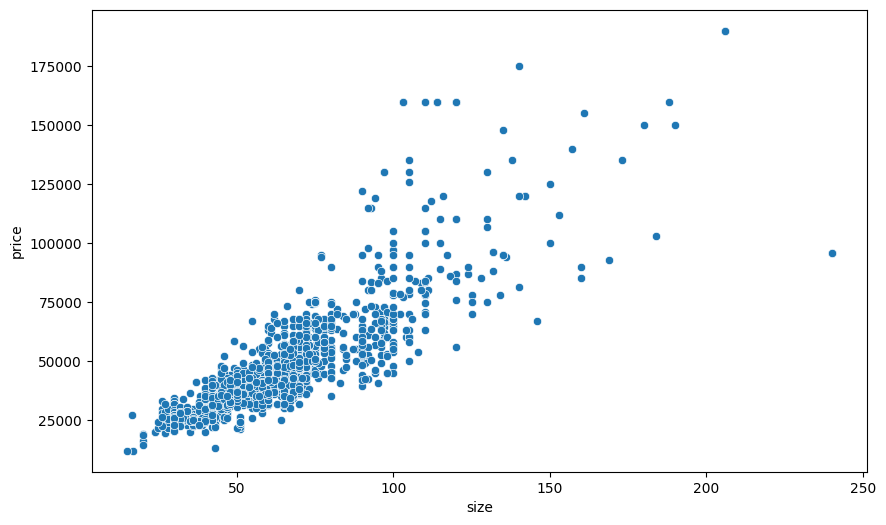

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

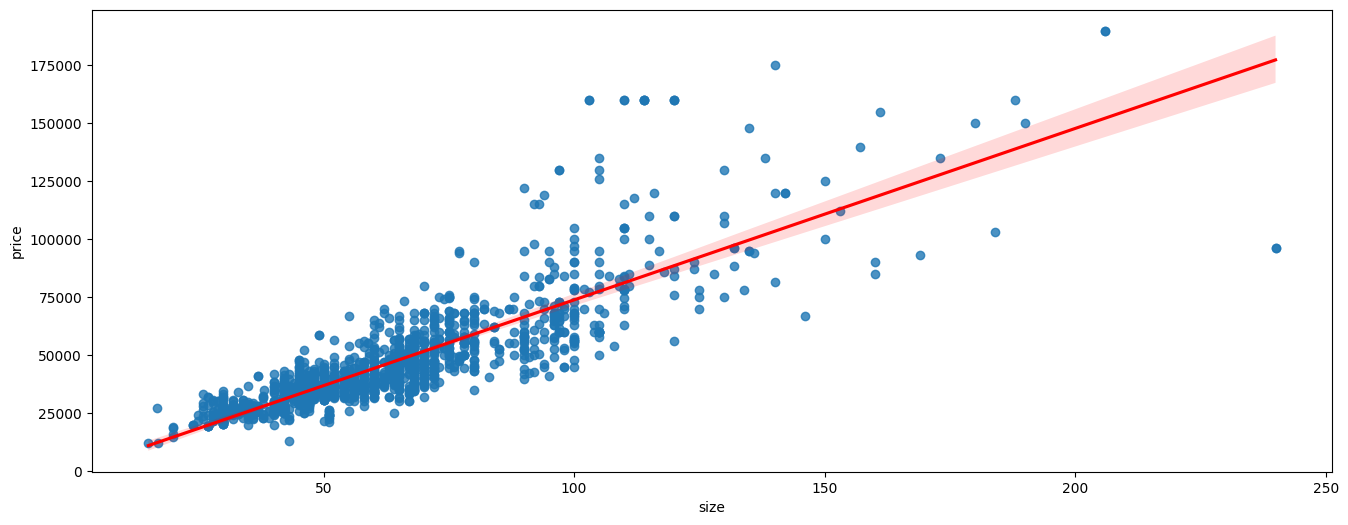

In [18]:
plt.figure(figsize=(16,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

Sizning vazifangiz yuqoridagi X va y o'zgaruvchilardan quyidagi formuladan foydalangan xolda
�
0
θ
0
​
  va
�
1
θ
1
​
  koeffisientlarni hisoblash.

In [20]:
import numpy as np

In [23]:
Xmean = np.mean(X)
ymean = np.mean(y)
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")


theta1=740.0264822713287


In [26]:
theta0 = ymean - theta1*Xmean
print(f"{theta0=}")

theta0=-195.94911352690542


2-vazifa


In [25]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")


x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [27]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")


y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


3-vazifa

In [28]:
# MAE
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")


MAE=4140.35031634715


In [29]:
# RMSE
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=5882.051673173715


Bizda ma'lumotlar kam, shuning uchun 10% test uchun olamiz

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)


Linear Regression ML

In [32]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])


In [33]:
# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')


theta1=732.7784051414766
theta0=106.31843170110369


Text(0, 0.5, 'Price')

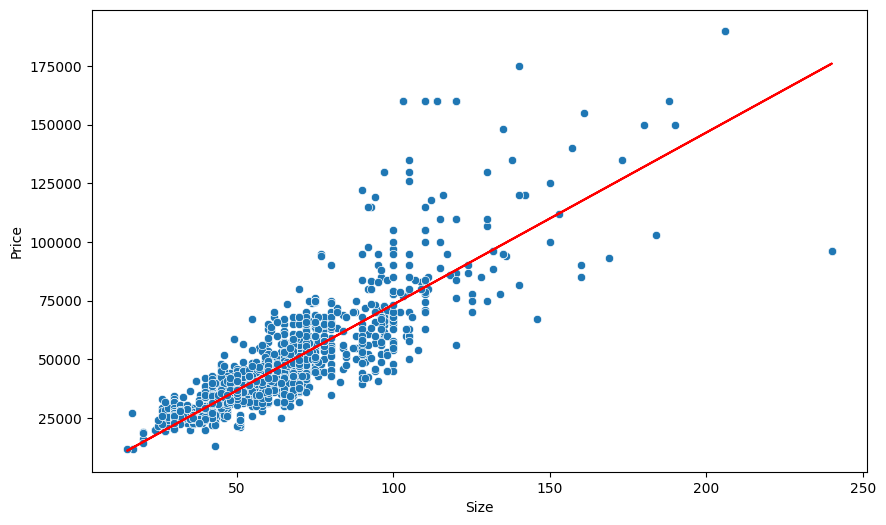

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")


In [35]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])


In [36]:
y_predict = LR_model.predict(x_test)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")


MAE=7269.709648262382
RMSE=12734.803748258666
